In [1]:
import numpy as nmp
import pandas as pds
import matplotlib.pyplot as pplt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

C:\Users\RU-CIT-317-C001\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
M = pds.read_csv('Sample Dataset.csv')
M = M.drop('CUST_ID', axis = 1)
M.fillna(method ='ffill', inplace = True)
print(M.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [3]:
scalerFD = StandardScaler()
M_scaled = scalerFD.fit_transform(M)
M_normalized = normalize(M_scaled)
M_normalized = pds.DataFrame(M_normalized)

In [4]:
pcaFD = PCA(n_components = 2) 
M_principal = pcaFD.fit_transform(M_normalized)
M_principal = pds.DataFrame(M_principal)
M_principal.columns = ['C1', 'C2']
print(M_principal.head())

         C1        C2
0 -0.489949 -0.679976
1 -0.519099  0.544828
2  0.330633  0.268878
3 -0.481657 -0.097608
4 -0.563512 -0.482506


In [5]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(M_principal)
labeling = db_default.labels_

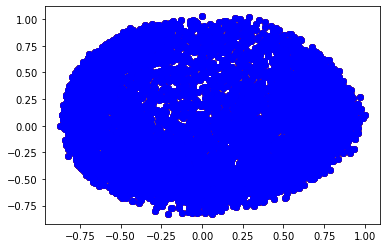

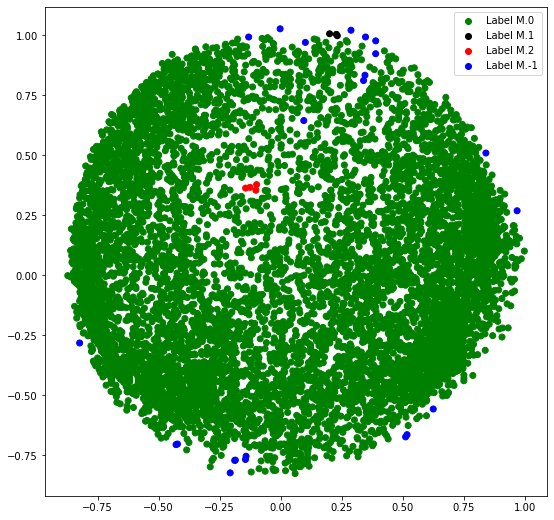

In [6]:
colours = {}
colours[0] = 'g'
colours[1] = 'k'
colours[2] = 'r'
colours[-1] = 'b'
cvec = [colours[label] for label in labeling]
g = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='g');
k = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='k');
r = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='r');
b = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='b');
pplt.figure(figsize =(9, 9))
pplt.scatter(M_principal['C1'], M_principal['C2'], c = cvec)
pplt.legend((g, k, r, b), ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1'))
pplt.show()

In [7]:
dts = DBSCAN(eps = 0.0375, min_samples = 50).fit(M_principal)
labeling = dts.labels_

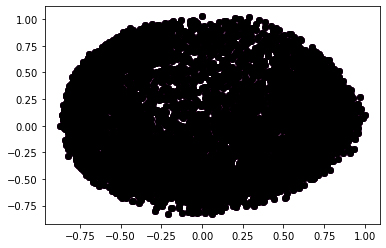

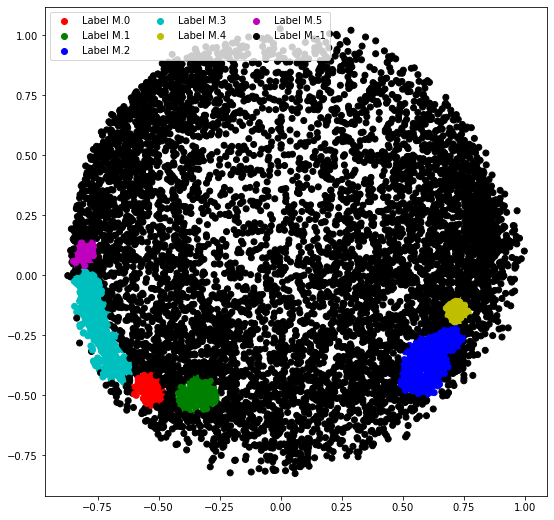

In [10]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
cvec = [colours1[label] for label in labeling]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
r = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[0])
g = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[1])
b = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[2])
c = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[3])
y = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[4])
m = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[5])
k = pplt.scatter(M_principal['C1'], M_principal['C2'], marker ='o', color = colors[6])
pplt.figure(figsize =(9, 9))
pplt.scatter(M_principal['C1'], M_principal['C2'], c = cvec)
pplt.legend((r, g, b, c, y, m, k),
            ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.3', 'Label M.4','Label M.5', 'Label M.-1'),
            scatterpoints = 1,
            loc ='upper left',
            ncol = 3,
            fontsize = 10)
pplt.show()